### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load data and check shape, info, missing values and duplicates

In [4]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

#Loading the data
data= pd.read_csv("habsos.csv", low_memory=False)

In [5]:
#Checking first 5 rows of the data
data.head(5)

,STATE_ID,DESCRIPTION,Unnamed: 2,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,CELLCOUNT_UNIT,CELLCOUNT_QA,SALINITY,SALINITY_UNIT,SALINITY_QA,WATER_TEMP,WATER_TEMP_UNIT,WATER_TEMP_QA,WIND_DIR,WIND_DIR_UNIT,WIND_DIR_QA,WIND_SPEED,WIND_SPEED_UNIT,WIND_SPEED_QA,OBJECTID,Unnamed: 27
0,TX,Copano Bay 4,NaN,28.07237,-97.21968,2023/09/27,7:14,NaN,Karenia,brevis,not observed,0,cells/L,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,2134075,NaN
1,TX,Copano Bay 2,NaN,27.99567,-97.16831,2023/09/27,8:21,NaN,Karenia,brevis,not observed,0,cells/L,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,2134077,NaN
2,TX,Copano Bay 3,NaN,28.03930,-97.15836,2023/09/27,7:45,NaN,Karenia,brevis,not observed,0,cells/L,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,2134076,NaN
3,TX,Copano Bay 1,NaN,28.06491,-97.11270,2023/09/27,9:07,NaN,Karenia,brevis,not observed,0,cells/L,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,2134078,NaN
4,FL,off New Smyrna Beach; Atlantic,NaN,29.17460,-78.27890,1990/12/20,NaN,0.5,Karenia,brevis,not observed,0,cells/L,1.0,NaN,NaN,9,24.2,deg. C,1,NaN,NaN,9,NaN,NaN,9,1590299,NaN


In [6]:
#Checking the number of columns and rows in the data
data.shape

(211834, 28)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211834 entries, 0 to 211833
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATE_ID         211834 non-null  object 
 1   DESCRIPTION      211811 non-null  object 
 2   Unnamed: 2       0 non-null       float64
 3   LATITUDE         211834 non-null  float64
 4   LONGITUDE        211834 non-null  float64
 5   SAMPLE_DATE      211834 non-null  object 
 6   SAMPLE_TIME      162914 non-null  object 
 7   SAMPLE_DEPTH     206331 non-null  float64
 8   GENUS            211834 non-null  object 
 9   SPECIES          211834 non-null  object 
 10  CATEGORY         210978 non-null  object 
 11  CELLCOUNT        211834 non-null  int64  
 12  CELLCOUNT_UNIT   211834 non-null  object 
 13  CELLCOUNT_QA     211642 non-null  float64
 14  SALINITY         108098 non-null  float64
 15  SALINITY_UNIT    108098 non-null  object 
 16  SALINITY_QA      211834 non-null  int6

In [8]:
#Checking for missing values

data.isna().sum()

STATE_ID                0
DESCRIPTION            23
Unnamed: 2         211834
LATITUDE                0
LONGITUDE               0
SAMPLE_DATE             0
SAMPLE_TIME         48920
SAMPLE_DEPTH         5503
GENUS                   0
SPECIES                 0
CATEGORY              856
CELLCOUNT               0
CELLCOUNT_UNIT          0
CELLCOUNT_QA          192
SALINITY           103736
SALINITY_UNIT      103736
SALINITY_QA             0
WATER_TEMP         105110
WATER_TEMP_UNIT    105110
WATER_TEMP_QA           0
WIND_DIR           210805
WIND_DIR_UNIT      210805
WIND_DIR_QA             0
WIND_SPEED         209842
WIND_SPEED_UNIT    209842
WIND_SPEED_QA           0
OBJECTID                0
Unnamed: 27        211834
dtype: int64

In [9]:
#Percentage of missing values for each column

data.isna().mean().sort_values(ascending=False)*100

Unnamed: 27        100.000000
Unnamed: 2         100.000000
WIND_DIR_UNIT       99.514242
WIND_DIR            99.514242
WIND_SPEED_UNIT     99.059641
WIND_SPEED          99.059641
WATER_TEMP_UNIT     49.619041
WATER_TEMP          49.619041
SALINITY_UNIT       48.970420
SALINITY            48.970420
SAMPLE_TIME         23.093554
SAMPLE_DEPTH         2.597789
CATEGORY             0.404090
CELLCOUNT_QA         0.090637
DESCRIPTION          0.010858
SAMPLE_DATE          0.000000
OBJECTID             0.000000
WIND_SPEED_QA        0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
WIND_DIR_QA          0.000000
WATER_TEMP_QA        0.000000
CELLCOUNT            0.000000
GENUS                0.000000
SALINITY_QA          0.000000
SPECIES              0.000000
CELLCOUNT_UNIT       0.000000
STATE_ID             0.000000
dtype: float64

<Axes: >

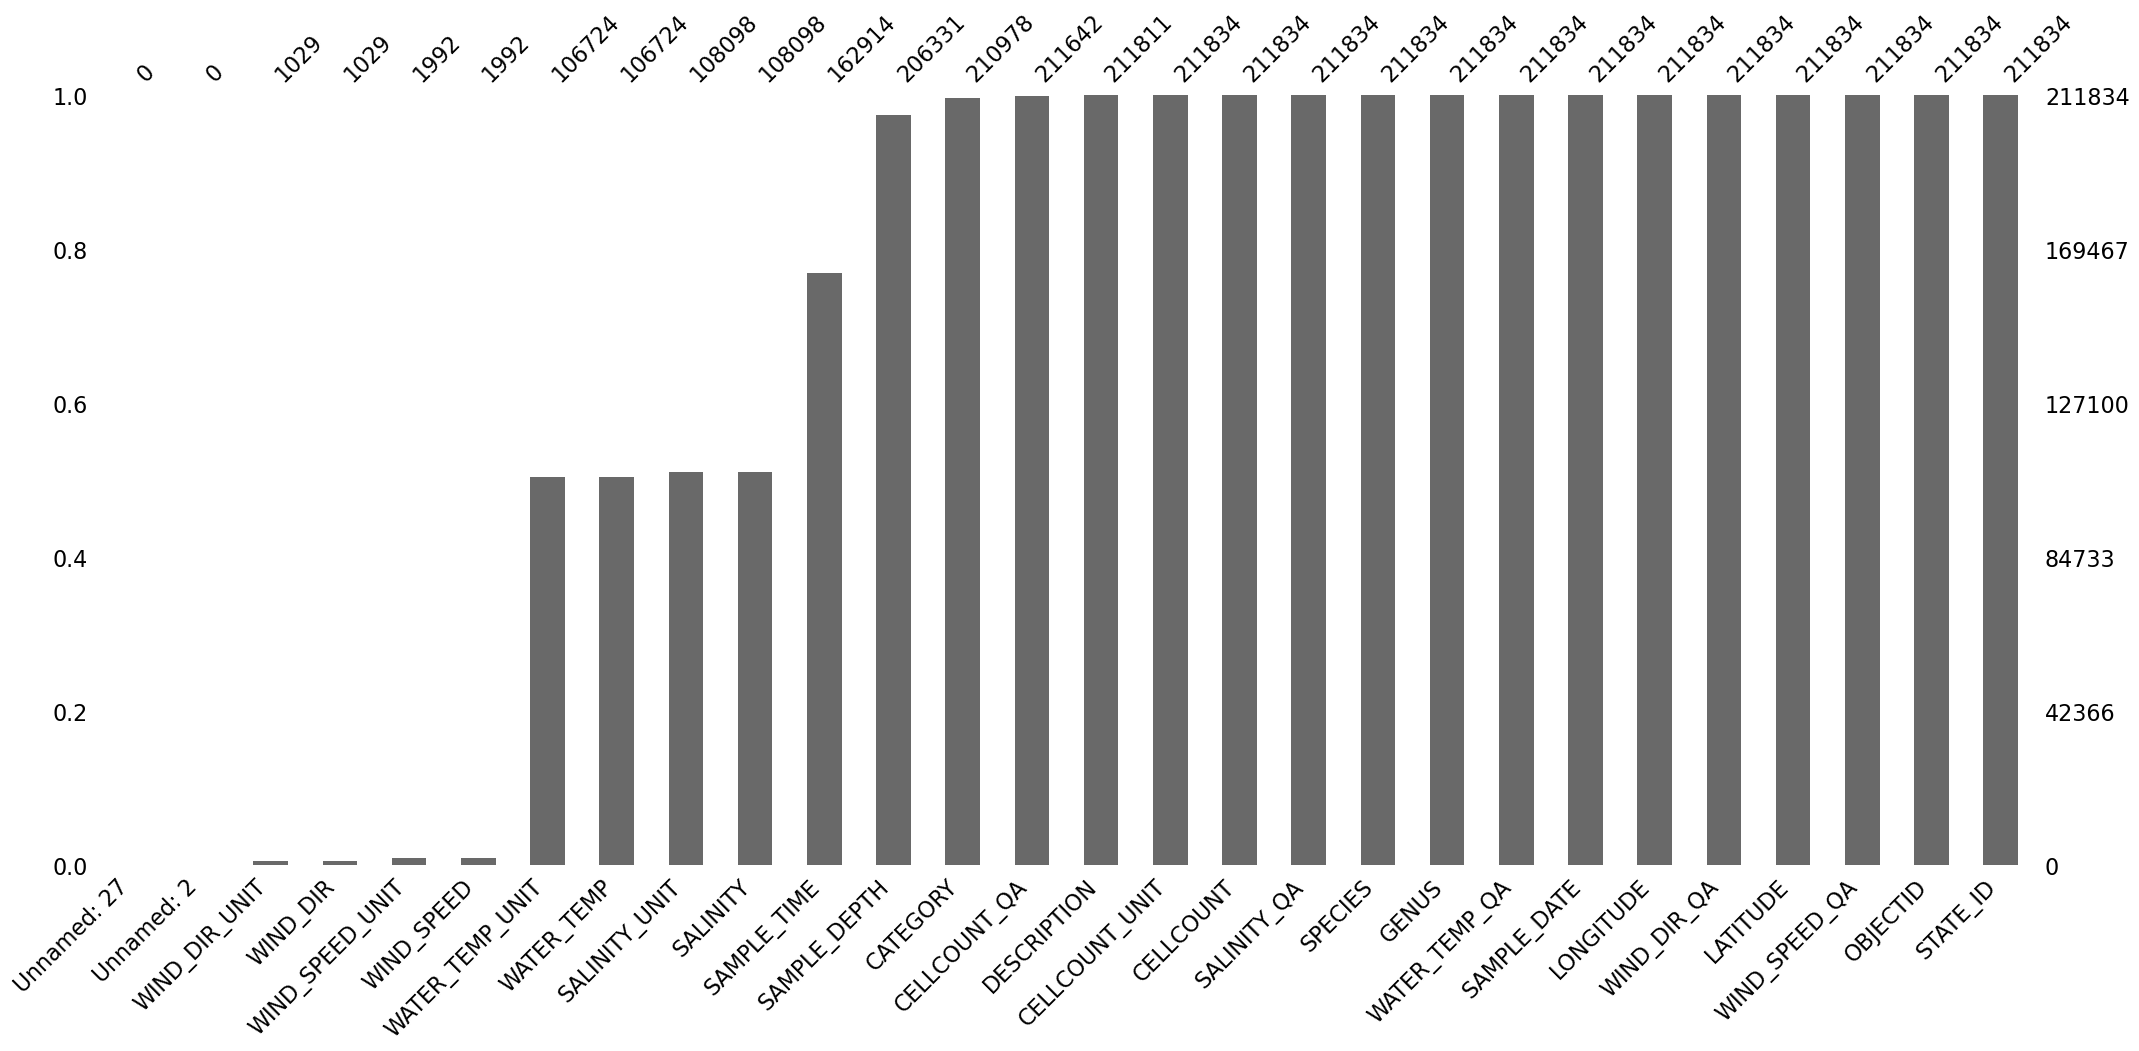

In [10]:
#Plot of Missing data per column
msno.bar(data, sort="ascending")

#### Columns that need to be dropped:
- Unnamed: 27 (100% missing values)
- Unnamed: 2 (100% missing values)
- WIND_DIR (99.51% missing values)
- WIND_DIR_UNIT (Unit of measurement, deg)
- WIND_DIR_QA (Data quality flag)
- CELLCOUNT_UNIT (Unit of measurement, cells/L)
- CELLCOUNT_QA (Data quality flag)
- SALINITY_UNIT (Unit of measurement, ppt)
- SALINITY_QA (Data quality flag)
- WIND_SPEED (99.06% missing values)
- WIND_SPEED_UNIT (Unit of measurement, mph)
- WIND_SPEED_QA (Data quality flag)
- WATER_TEMP_UNIT (Unit of measurement, deg C)
- WATER_TEMP_QA (Data quality flag)
- OBJECTID

In [11]:
#Dropping Irrelevant Columns
new_df= data.drop(['Unnamed: 27', 'Unnamed: 2', 'WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'CELLCOUNT_UNIT', 'CELLCOUNT_QA', 'SALINITY_UNIT', 'SALINITY_QA', 'WIND_SPEED', 'WIND_SPEED_UNIT', 'WIND_SPEED_QA', 'WATER_TEMP_UNIT', 'WATER_TEMP_QA', 'OBJECTID' ], axis= 1)

In [12]:
new_df

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
0,TX,Copano Bay 4,28.07237,-97.21968,2023/09/27,7:14,NaN,Karenia,brevis,not observed,0,NaN,NaN
1,TX,Copano Bay 2,27.99567,-97.16831,2023/09/27,8:21,NaN,Karenia,brevis,not observed,0,NaN,NaN
2,TX,Copano Bay 3,28.03930,-97.15836,2023/09/27,7:45,NaN,Karenia,brevis,not observed,0,NaN,NaN
3,TX,Copano Bay 1,28.06491,-97.11270,2023/09/27,9:07,NaN,Karenia,brevis,not observed,0,NaN,NaN
4,FL,off New Smyrna Beach; Atlantic,29.17460,-78.27890,1990/12/20,NaN,0.5,Karenia,brevis,not observed,0,NaN,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211829,TX,"Nueces Bay, East of Nueces River Delta",27.86611,-97.51636,2015/10/14,NaN,NaN,Karenia,brevis,not observed,0,NaN,NaN
211830,TX,Viola Turning Basin (Sample ID 1230-1),27.84455,-97.52228,2009/12/30,NaN,NaN,Karenia,brevis,high,1000000,NaN,NaN
211831,TX,"South Padre Island, Brazos Santiago Pass south...",26.18451,-97.66535,2015/09/25,17:30,NaN,Karenia,brevis,medium,922000,34.0,29.0
211832,TX,"South Padre Island, Brazos Santiago Pass south...",26.18451,-97.66535,2015/10/02,18:42,NaN,Karenia,brevis,high,1513000,NaN,NaN


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211834 entries, 0 to 211833
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STATE_ID      211834 non-null  object 
 1   DESCRIPTION   211811 non-null  object 
 2   LATITUDE      211834 non-null  float64
 3   LONGITUDE     211834 non-null  float64
 4   SAMPLE_DATE   211834 non-null  object 
 5   SAMPLE_TIME   162914 non-null  object 
 6   SAMPLE_DEPTH  206331 non-null  float64
 7   GENUS         211834 non-null  object 
 8   SPECIES       211834 non-null  object 
 9   CATEGORY      210978 non-null  object 
 10  CELLCOUNT     211834 non-null  int64  
 11  SALINITY      108098 non-null  float64
 12  WATER_TEMP    106724 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 21.0+ MB


From the data dictionary, all data points where sample time is 0:00 means the time was not collected. We will replace all null values of sample time with 0:00

In [14]:
#Replacing all missing values of sample time with "0:00"
new_df["SAMPLE_TIME"]= new_df["SAMPLE_TIME"].fillna("0:00")

In [15]:
#Converting Sample Date and Sample time to datetime objects

new_df["SAMPLE_DATE"]= pd.to_datetime(new_df["SAMPLE_DATE"])
new_df["SAMPLE_TIME"]= pd.to_datetime(new_df["SAMPLE_TIME"], format='%H:%M', errors='coerce').dt.time

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211834 entries, 0 to 211833
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   STATE_ID      211834 non-null  object        
 1   DESCRIPTION   211811 non-null  object        
 2   LATITUDE      211834 non-null  float64       
 3   LONGITUDE     211834 non-null  float64       
 4   SAMPLE_DATE   211834 non-null  datetime64[ns]
 5   SAMPLE_TIME   211834 non-null  object        
 6   SAMPLE_DEPTH  206331 non-null  float64       
 7   GENUS         211834 non-null  object        
 8   SPECIES       211834 non-null  object        
 9   CATEGORY      210978 non-null  object        
 10  CELLCOUNT     211834 non-null  int64         
 11  SALINITY      108098 non-null  float64       
 12  WATER_TEMP    106724 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 21.0+ MB


### Perform preliminary descriptive analysis of numerical features and categorical features

In [17]:
#Descriptive analysis of Numerical Features

new_df.describe().T

,count,mean,min,25%,50%,75%,max,std
LATITUDE,211834.0,27.44232,24.0,26.6208,27.3316,27.89512,30.7149,1.276994
LONGITUDE,211834.0,-82.867511,-97.66535,-82.765,-82.5562,-82.0831,-78.2789,2.192826
SAMPLE_DATE,211834,2005-10-18 15:27:24.823777280,1953-08-19 00:00:00,2001-09-22 00:00:00,2011-10-06 00:00:00,2018-03-21 00:00:00,2024-03-25 00:00:00,NaN
SAMPLE_DEPTH,206331.0,1.935614,0.0,0.5,0.5,0.5,600.0,5.918548
CELLCOUNT,211834.0,126301.013983,0.0,0.0,0.0,0.0,388400000.0,2210581.823088
SALINITY,108098.0,30.877569,0.0,28.55,33.0,35.0,86.0,6.521518
WATER_TEMP,106724.0,24.768907,4.0,21.1,25.4,29.1,39.9,5.045374


#### Insights
- Minimum water salinity is 0: In reality salinity cannot be exactly zero. Even freshwater contains trace amounts of salts.
- 25% of the data has salinity level lower than 28.55ppt, 50% has salinity lower than 33.00ppt and 75% of the data has salinity lower than 35.00ppt.
- The minimum temp of the water sampled is 4.00deg and maximum temp is 39.90deg
- Minumum sample depth is 0, however in reality sample depth cannot be zero. From the data dictionary null values for sample depth means that the sample was collected at the surface of the water or near the surface of the water. 
- Mean sample depth is 1.94meters however maximum sample depth is 600meters.

In [18]:
#Checking sum of data points where SALINITY=0
new_df[new_df["SALINITY"]== 0]["SALINITY"].value_counts()

SALINITY
0.0    3
Name: count, dtype: int64

In [19]:
new_df[new_df["SALINITY"]== 0]

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
6604,FL,Turkey Creek,28.01624,-80.60092,2022-06-01,12:30:00,0.6,Karenia,brevis,not observed,0,0.0,26.67
45050,FL,Southeast 14th Terrace; canal S of,26.62528,-81.95587,2022-07-26,16:50:00,0.1,Karenia,brevis,not observed,0,0.0,NaN
205198,AL,Bear Point C.A.,30.30880,-87.52700,2019-05-22,00:00:00,NaN,Karenia,brevis,not observed,0,0.0,NaN


Three (3) data points have Salinity of 0.

In [20]:
#Checking sum of data points where sample depth=0
new_df[new_df["SAMPLE_DEPTH"]==0]["SAMPLE_DEPTH"].value_counts()

SAMPLE_DEPTH
0.0    4211
Name: count, dtype: int64

There are 4211 points where the sample depth is 0.
From the data dictionary, when sample depth is null it means the sample was collected at the surface of the water so we convert all null values to 0.

In [21]:
#Descriptive analysis of Categorical Features

new_df.describe(include='object').T

,count,unique,top,freq
STATE_ID,211834,4,FL,205168
DESCRIPTION,211811,29494,New Pass Dock (Sarasota Bay),5149
SAMPLE_TIME,211834,1427,00:00:00,48920
GENUS,211834,1,Karenia,211834
SPECIES,211834,1,brevis,211834
CATEGORY,210978,5,not observed,164102


### Clean data of missing values and duplicate data

In [22]:
df= new_df.copy(deep=True)

#Replacing Salinity of 0 to NaN
df["SALINITY"]= df["SALINITY"].replace(0.00, np.NaN)

#Replacing all null values of sample depth to 0
df["SAMPLE_DEPTH"]= df["SAMPLE_DEPTH"].replace(np.NaN, 0)

In [23]:
#Getting total count of state by location

count_of_state= df.groupby("STATE_ID")["DESCRIPTION"].size()
count_of_state

STATE_ID
AL      2481
FL    205168
MS      1050
TX      3135
Name: DESCRIPTION, dtype: int64

In [24]:
#Getting counts of all locations by state
location_count_by_state = df.groupby(['STATE_ID', 'DESCRIPTION']).size().reset_index(name='count')
location_count_by_state

,STATE_ID,DESCRIPTION,count
0,AL,070208-05,1
1,AL,1 Mi South of Point aux Pines,1
2,AL,30 16.761N surface/87 33.018 W Bottom,1
3,AL,30 16.931N Surface/87 32.648 N bottom,1
4,AL,30 17.223 N Surface/87 33.489W Bottom,1
...,...,...,...
29495,TX,offshore Key Allegro,5
29496,TX,offshore Key Allegro #2,1
29497,TX,old Parrot Eyes,6
29498,TX,ripline south of Mud Island,1


In [25]:
#Getting the locations with the highest counts by state

max_location= location_count_by_state.loc[location_count_by_state.groupby("STATE_ID")['count'].idxmax()]
max_location

,STATE_ID,DESCRIPTION,count
17,AL,Alabama Point,213
18011,FL,New Pass Dock (Sarasota Bay),5149
28616,MS,2_14,73
29470,TX,West End of Queen Isabella Causeway,142


In [26]:
#Dropping null values of location

df.dropna(subset="DESCRIPTION", inplace=True)

In [27]:
#Dropping Null Values for Category
df.dropna(subset="CATEGORY", inplace=True)

In [28]:
df.isna().sum()

STATE_ID             0
DESCRIPTION          0
LATITUDE             0
LONGITUDE            0
SAMPLE_DATE          0
SAMPLE_TIME          0
SAMPLE_DEPTH         0
GENUS                0
SPECIES              0
CATEGORY             0
CELLCOUNT            0
SALINITY        103251
WATER_TEMP      104835
dtype: int64

In [29]:
#Number of rows of missing values for salinity
missing_salinity= df["SALINITY"].isnull()

In [30]:
#Checking if rows with missing values for salinity have missing values for water temp

missing_salinity_temp= df[missing_salinity]['WATER_TEMP'].isnull().sum()
missing_salinity_temp

93391

93,401 rows of missing values for SALINITY have missing values for WATER TEMP therefore we can drop those rows of missing values.

In [31]:
df.dropna(subset=["SALINITY", "WATER_TEMP"], inplace=True)

In [32]:
df.reset_index(drop=True)

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
0,FL,off Daytona Beach,29.10580,-79.50150,1980-12-11,13:05:00,0.5000,Karenia,brevis,not observed,0,36.0,26.000000
1,FL,off Cape Canaveral,28.50620,-79.51650,1980-12-11,13:25:00,0.5000,Karenia,brevis,not observed,0,36.0,26.000000
2,FL,West Palm Beach; 16 mi off,26.68330,-79.85000,1977-11-28,13:45:00,0.5000,Karenia,brevis,very low,2000,36.0,26.000000
3,FL,Palm Beach; East to 100 fm depth,26.69370,-79.95420,1981-10-06,00:00:00,27.4000,Karenia,brevis,not observed,0,36.0,27.500000
4,FL,Palm Beach; East to 100 fm depth,26.69370,-79.95420,1981-10-06,00:00:00,0.5000,Karenia,brevis,not observed,0,34.0,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96255,TX,CC Ship Channel near Harbor Bridge,27.81139,-97.39167,2006-11-07,18:17:00,0.0000,Karenia,brevis,very low,6600,34.6,23.720000
96256,TX,SW End of Brownsville Ship Channel,25.95120,-97.40167,2011-09-28,16:20:00,0.3048,Karenia,brevis,high,20300000,38.0,29.440000
96257,TX,SW End of Brownsville Ship Channel,25.95120,-97.40167,2011-10-08,13:55:00,0.0000,Karenia,brevis,very low,1000,38.0,27.777778
96258,TX,"South Padre Island, Brazos Santiago Pass south...",26.18451,-97.66535,2015-09-25,17:30:00,0.0000,Karenia,brevis,medium,922000,34.0,29.000000


In [33]:
cleaned_data= df.copy(deep=True).reset_index(drop=True)

In [34]:
cleaned_data

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
0,FL,off Daytona Beach,29.10580,-79.50150,1980-12-11,13:05:00,0.5000,Karenia,brevis,not observed,0,36.0,26.000000
1,FL,off Cape Canaveral,28.50620,-79.51650,1980-12-11,13:25:00,0.5000,Karenia,brevis,not observed,0,36.0,26.000000
2,FL,West Palm Beach; 16 mi off,26.68330,-79.85000,1977-11-28,13:45:00,0.5000,Karenia,brevis,very low,2000,36.0,26.000000
3,FL,Palm Beach; East to 100 fm depth,26.69370,-79.95420,1981-10-06,00:00:00,27.4000,Karenia,brevis,not observed,0,36.0,27.500000
4,FL,Palm Beach; East to 100 fm depth,26.69370,-79.95420,1981-10-06,00:00:00,0.5000,Karenia,brevis,not observed,0,34.0,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96255,TX,CC Ship Channel near Harbor Bridge,27.81139,-97.39167,2006-11-07,18:17:00,0.0000,Karenia,brevis,very low,6600,34.6,23.720000
96256,TX,SW End of Brownsville Ship Channel,25.95120,-97.40167,2011-09-28,16:20:00,0.3048,Karenia,brevis,high,20300000,38.0,29.440000
96257,TX,SW End of Brownsville Ship Channel,25.95120,-97.40167,2011-10-08,13:55:00,0.0000,Karenia,brevis,very low,1000,38.0,27.777778
96258,TX,"South Padre Island, Brazos Santiago Pass south...",26.18451,-97.66535,2015-09-25,17:30:00,0.0000,Karenia,brevis,medium,922000,34.0,29.000000


In [35]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96260 entries, 0 to 96259
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATE_ID      96260 non-null  object        
 1   DESCRIPTION   96260 non-null  object        
 2   LATITUDE      96260 non-null  float64       
 3   LONGITUDE     96260 non-null  float64       
 4   SAMPLE_DATE   96260 non-null  datetime64[ns]
 5   SAMPLE_TIME   96260 non-null  object        
 6   SAMPLE_DEPTH  96260 non-null  float64       
 7   GENUS         96260 non-null  object        
 8   SPECIES       96260 non-null  object        
 9   CATEGORY      96260 non-null  object        
 10  CELLCOUNT     96260 non-null  int64         
 11  SALINITY      96260 non-null  float64       
 12  WATER_TEMP    96260 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 9.5+ MB


In [36]:
cleaned_data.describe().T

,count,mean,min,25%,50%,75%,max,std
LATITUDE,96260.0,27.6084,24.0,26.5902,27.5467,28.1505,30.7149,1.329027
LONGITUDE,96260.0,-82.889204,-97.66535,-82.8243,-82.5779,-81.92366,-79.5015,2.348355
SAMPLE_DATE,96260,2002-07-21 12:58:08.851028480,1954-02-05 00:00:00,1996-01-28 06:00:00,2013-01-22 00:00:00,2018-12-17 00:00:00,2024-03-25 00:00:00,NaN
SAMPLE_DEPTH,96260.0,1.953319,0.0,0.5,0.5,0.5,600.0,5.979669
CELLCOUNT,96260.0,86904.350914,0.0,0.0,0.0,0.0,388400000.0,1924648.55532
SALINITY,96260.0,30.725678,0.02,28.1,33.0,35.04,86.0,6.664326
WATER_TEMP,96260.0,24.767301,4.32,21.0,25.4,29.1,39.9,5.058842


In [37]:
#Creating a new columns SAMPLE MONTH and SAMPLE YEAR
cleaned_data["SAMPLE_MONTH_NAME"]= cleaned_data["SAMPLE_DATE"].dt.strftime("%b")
cleaned_data["SAMPLE_MONTH_NUMBER"]= cleaned_data["SAMPLE_DATE"].dt.month
cleaned_data["SAMPLE_YEAR"]= cleaned_data["SAMPLE_DATE"].dt.year

In [38]:
#checking for duplicates
cleaned_data[cleaned_data.duplicated()]

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP,SAMPLE_MONTH_NAME,SAMPLE_MONTH_NUMBER,SAMPLE_YEAR
323,FL,Little Mud Creek,27.22360,-80.15280,2004-09-01,14:41:00,0.5,Karenia,brevis,not observed,0,33.70,31.4,Sep,9,2004
890,FL,Bear Point Bay,27.41685,-80.26691,2004-08-26,00:00:00,0.5,Karenia,brevis,not observed,0,32.80,29.9,Aug,8,2004
891,FL,Bear Point Bay,27.41685,-80.26691,2004-08-26,00:00:00,0.5,Karenia,brevis,not observed,0,32.80,29.9,Aug,8,2004
892,FL,Bear Point Bay,27.41685,-80.26691,2004-08-26,00:00:00,0.5,Karenia,brevis,not observed,0,32.80,29.9,Aug,8,2004
1266,FL,Fish Cove House,27.50767,-80.32568,2004-09-01,13:21:00,0.5,Karenia,brevis,not observed,0,28.50,30.8,Sep,9,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83533,FL,Alligator Point; ~12 mi S,29.70350,-84.33180,1996-05-30,12:55:00,0.6,Karenia,brevis,very low,1000,32.50,27.7,May,5,1996
84747,FL,Millender Street; S of (St. George Sound),29.73010,-84.88478,2021-04-21,14:53:00,0.1,Karenia,brevis,not observed,0,10.92,21.2,Apr,4,2021
91223,FL,Poquito Park/Longwood Park,30.45583,-86.58778,2006-02-15,03:20:00,0.4,Karenia,brevis,not observed,0,16.69,21.2,Feb,2,2006
93288,AL,Gulf Shores Public Beach,30.24778,-87.69000,2023-08-28,15:28:00,0.0,Karenia,brevis,not observed,0,34.00,31.9,Aug,8,2023


There are 61 duplicates.

In [39]:
#Dropping the duplicates

cleaned_data= cleaned_data.drop_duplicates(keep='first')

In [40]:
cleaned_data["SAMPLE_YEAR"].describe()

count    96199.000000
mean      2002.035697
std         23.038290
min       1954.000000
25%       1996.000000
50%       2013.000000
75%       2018.000000
max       2024.000000
Name: SAMPLE_YEAR, dtype: float64

In [41]:
#Checking sample month counts for initial year, 1954
cleaned_data[cleaned_data["SAMPLE_YEAR"]== 1954]["SAMPLE_MONTH_NAME"].value_counts()

SAMPLE_MONTH_NAME
Dec    124
Aug     96
Oct     91
Jun     77
Sep     75
Mar     62
Nov     53
Apr     44
Feb     32
May     31
Jul     16
Name: count, dtype: int64

In [42]:
#Checking sample month counts for 2024
cleaned_data[cleaned_data["SAMPLE_YEAR"]== 2024]["SAMPLE_MONTH_NAME"].value_counts()

SAMPLE_MONTH_NAME
Feb    286
Mar    190
Jan     32
Name: count, dtype: int64

Data includes only three months of 2024 so we drop those data points for 2024

In [43]:
new_data = cleaned_data[cleaned_data["SAMPLE_YEAR"] != 2024]

In [44]:
new_data

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP,SAMPLE_MONTH_NAME,SAMPLE_MONTH_NUMBER,SAMPLE_YEAR
0,FL,off Daytona Beach,29.10580,-79.50150,1980-12-11,13:05:00,0.5000,Karenia,brevis,not observed,0,36.0,26.000000,Dec,12,1980
1,FL,off Cape Canaveral,28.50620,-79.51650,1980-12-11,13:25:00,0.5000,Karenia,brevis,not observed,0,36.0,26.000000,Dec,12,1980
2,FL,West Palm Beach; 16 mi off,26.68330,-79.85000,1977-11-28,13:45:00,0.5000,Karenia,brevis,very low,2000,36.0,26.000000,Nov,11,1977
3,FL,Palm Beach; East to 100 fm depth,26.69370,-79.95420,1981-10-06,00:00:00,27.4000,Karenia,brevis,not observed,0,36.0,27.500000,Oct,10,1981
4,FL,Palm Beach; East to 100 fm depth,26.69370,-79.95420,1981-10-06,00:00:00,0.5000,Karenia,brevis,not observed,0,34.0,27.000000,Oct,10,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96255,TX,CC Ship Channel near Harbor Bridge,27.81139,-97.39167,2006-11-07,18:17:00,0.0000,Karenia,brevis,very low,6600,34.6,23.720000,Nov,11,2006
96256,TX,SW End of Brownsville Ship Channel,25.95120,-97.40167,2011-09-28,16:20:00,0.3048,Karenia,brevis,high,20300000,38.0,29.440000,Sep,9,2011
96257,TX,SW End of Brownsville Ship Channel,25.95120,-97.40167,2011-10-08,13:55:00,0.0000,Karenia,brevis,very low,1000,38.0,27.777778,Oct,10,2011
96258,TX,"South Padre Island, Brazos Santiago Pass south...",26.18451,-97.66535,2015-09-25,17:30:00,0.0000,Karenia,brevis,medium,922000,34.0,29.000000,Sep,9,2015


In [45]:
#Splitting data into numerical and categorical data

num_cols= new_data.select_dtypes(include=[np.number]).columns
cat_cols= new_data.select_dtypes(exclude=[np.number]).columns

numerical_df= new_data[num_cols]
categorical_df= new_data[cat_cols]

### Univariate analysis of numerical variables. check the distributions

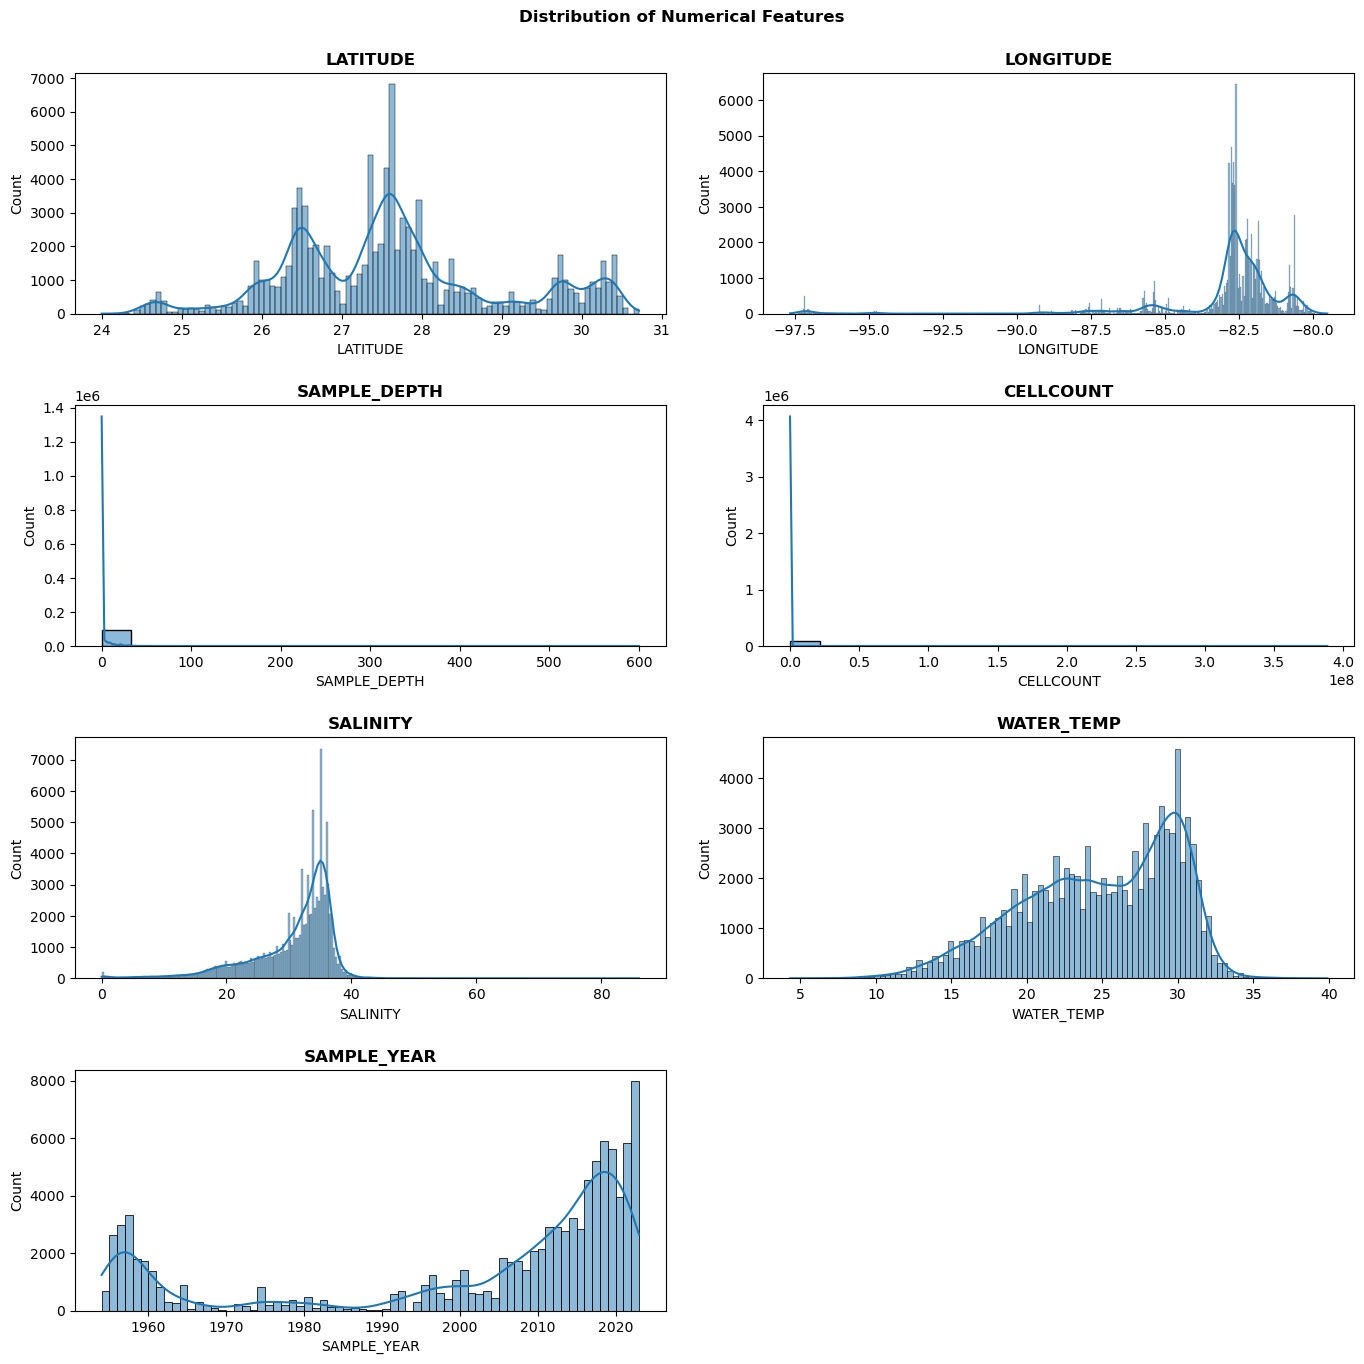

In [46]:
plt.figure(figsize=(14,14))
plt.suptitle("Distribution of Numerical Features", fontweight='bold')

for i, col in enumerate(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1)):
    plt.subplot(4,2, i+1)
    sns.histplot(numerical_df[col], kde=True)
    plt.title(f"{col}", fontweight='bold')
    plt.tight_layout(pad=2)

### Checking the skewness of each feature

In [47]:
def check_skewness(df, col):
    skewness= df[col].skew()
    print(f"Skewness of {col} : {skewness}")

In [48]:
check_skewness(numerical_df, num_cols)

Skewness of Index(['LATITUDE', 'LONGITUDE', 'SAMPLE_DEPTH', 'CELLCOUNT', 'SALINITY',
       'WATER_TEMP', 'SAMPLE_MONTH_NUMBER', 'SAMPLE_YEAR'],
      dtype='object') : LATITUDE                 0.402875
LONGITUDE               -3.751918
SAMPLE_DEPTH            25.618026
CELLCOUNT              110.522871
SALINITY                -1.630800
WATER_TEMP              -0.496774
SAMPLE_MONTH_NUMBER     -0.136566
SAMPLE_YEAR             -1.130958
dtype: float64


Interpretation of skewness results

- LATITUDE(0.399353): The positive skewness indicates that most latitude values are concentrated toward the lower end, with a few higher values extending the tail to the right. This suggests that there may be a larger number of samples at lower latitudes with fewer samples at higher latitudes.

- LONGITUDE(-3.742294): The negative skewness suggests that most longitude values are concentrated on the higher end, with a tail extending to the left. This means there are more values at the eastern longitudes, with some western longitudes pulling the average down.

- SAMPLE_DEPTH(25.679324): A positive skewness indicates that most sample depths are relatively shallow, with some deeper samples extending the tail to the right. This could imply that the majority of data is collected from shallow areas, while deeper areas are less frequently sampled.

- CELLCOUNT(110.849764): The positive skewness suggests that the majority of cell count values are lower, with a few higher counts extending the tail to the right. This might indicate that most samples have low to moderate cell counts, while a few samples have significantly higher counts.

- SALINITY(-1.629339): The negative skewness indicates that most salinity values are on the higher end, with some lower values extending the tail to the left. This suggests that there might be a prevalence of higher salinity readings, with fewer instances of very low salinity.

- WATER_TEMP(-0.489372): The negative skewness suggests that water temperature values are concentrated toward the higher end, with a tail extending to the left. This means that most water temperatures are higher, with a few lower temperatures creating the left tail.

- SAMPLE_YEAR(-1.130958): The distribution is left-skewed, with a longer tail on the left side. This suggests that the majority of the sample years are concentrated towards the more recent or higher end, while there are fewer older years pulling the average down.

### Univariate analysis of categorical variables. count plots of each feature with labels, pie charts if necessary

In [57]:
categorical_df.describe(include='object').T

,count,unique,top,freq
STATE_ID,95691,4,FL,92043
DESCRIPTION,95691,9336,New Pass Dock (Sarasota Bay),1400
SAMPLE_TIME,95691,1325,00:00:00,5278
GENUS,95691,1,Karenia,95691
SPECIES,95691,1,brevis,95691
CATEGORY,95691,5,not observed,77419
SAMPLE_MONTH_NAME,95691,12,Oct,9814


Key Insights
- Only one type of Genus(Karenia) and one type of species(brevis)
- There re 4 different states in consideration. Florida, Texas, Alabama and Missisipi
- 5 different types of cellcount categories (not observed, very low, low, medium, high)
- 9336 unique locations

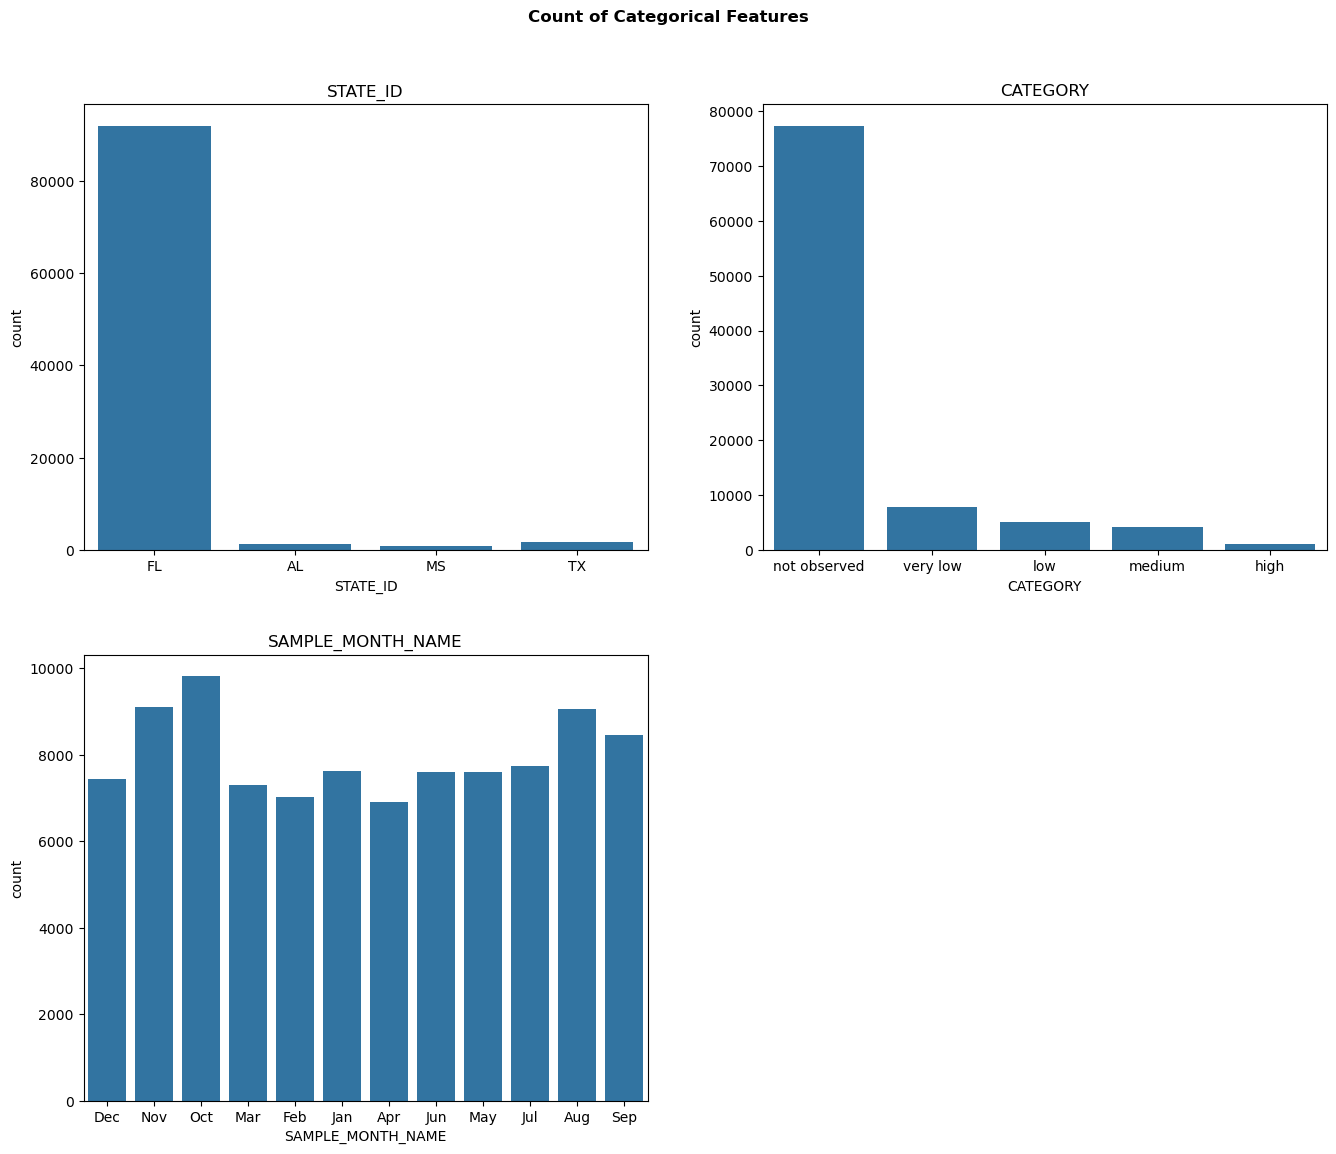

In [60]:
plt.figure(figsize=(14,12))
plt.suptitle("Count of Categorical Features", fontweight='bold')

for i, col in enumerate(categorical_df.drop(["SAMPLE_DATE", "SAMPLE_TIME", "DESCRIPTION", "SPECIES", "GENUS"], axis=1)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=categorical_df[col])
    plt.title(f"{col}")
    plt.tight_layout(pad=3)
    

### Bivariate analysis of numerical varibles, scatter plots, correlation heatmaps

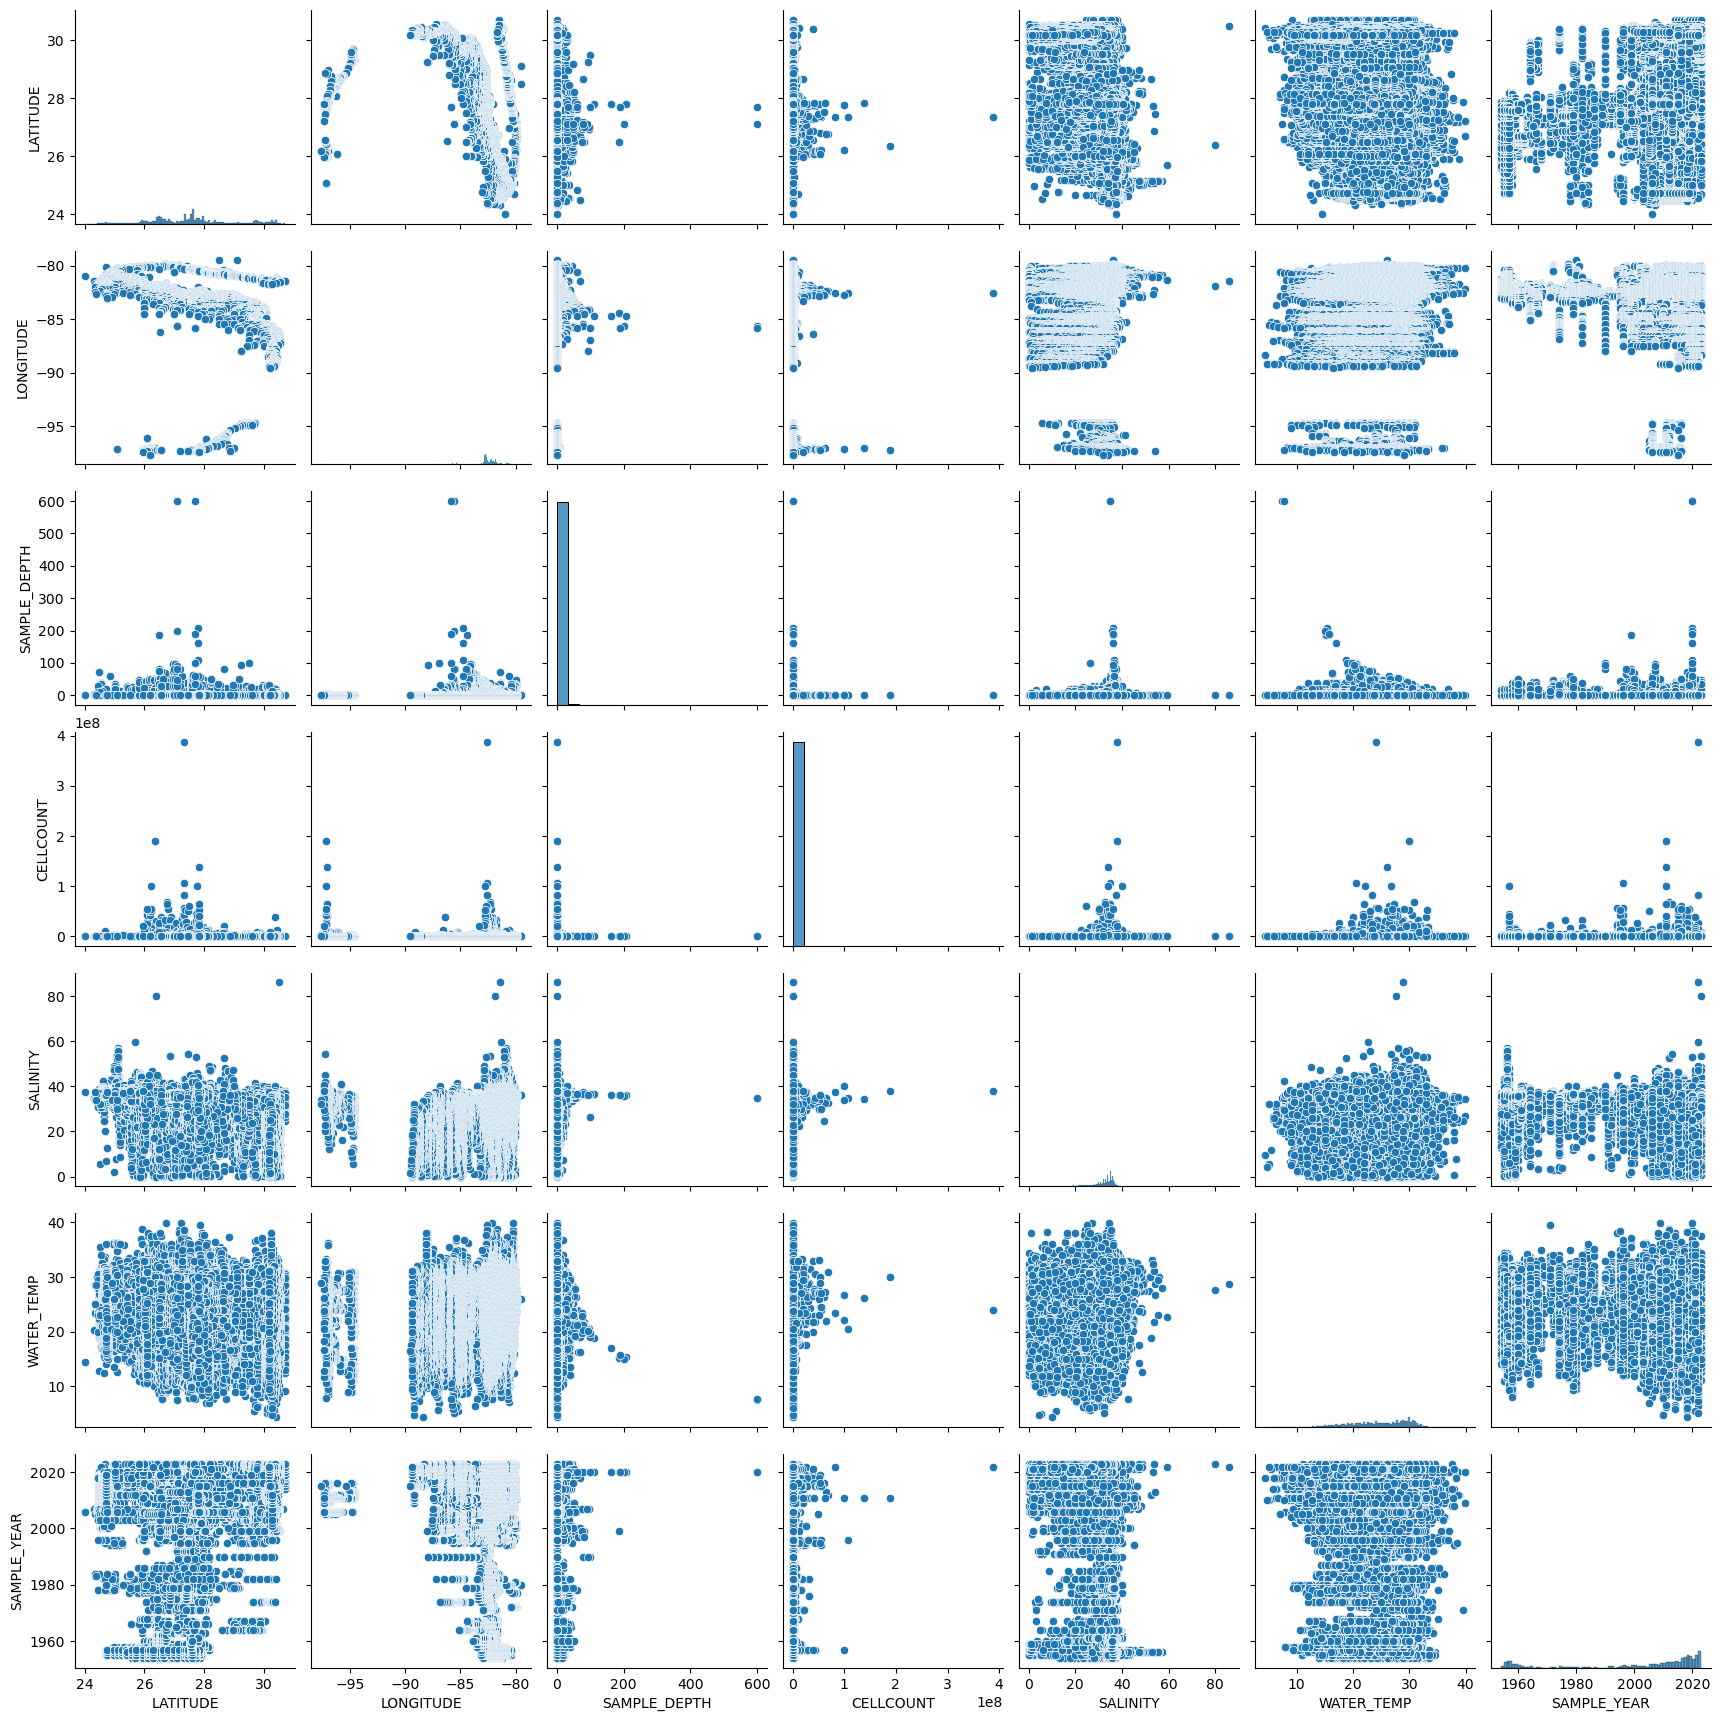

In [61]:
#Pairplot of numerical features

sns.pairplot(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1))

### Bivariate Analysis of categorical variables, count plots with hues

### Bivariate analysis of numerical variables and categorical variables

### Multivariate analysis